<a href="https://colab.research.google.com/github/FadelAnfasha/LearnDataAnalyst/blob/main/FinalProject_Fadel_Anfasha_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| unique value for order_detail table
customer_id 		|object|unique for customer
order_date 		|object| transaction date
sku_id 			|object| unique value for product (sku is stock keeping unit)
price			|int64| price from product
qty_ordered 		|int64| quantity ordered
before_discount	|float64| total price from product (price * qty_ordered)
discount_amount	|float64| discount value
after_discount		|float64| price value after discount
is_gross 		|int64| Indicates that the customer has not paid for the order
is_valid		|int64| Indicates that the customer has paid for the order
is_net			|int64| Indicates that transaction done
payment_id 		|int64| unique value for payment method
||
**sku_detail:**
id |object| unique value for sku_detail table
sku_name 		|object| name of product
base_price		|float64| the price of the item listed on the price tag / price
cogs 			|int64| total cost to sell 1 product (cogs is cost of goods sold)
category		|object| product category
||
**customer_detail:**
id 			|object| unique value for customer_detail table
registered_date	|object| the date when the customer began registering as a member
||
**payment_detail:**
id			|int64| unique value for payment_detail table
payment_method	|object| payment method used


In [2]:
url = 'https://raw.githubusercontent.com/FadelAnfasha/LearnDataAnalyst/main/tokopaedi.csv'
df = pd.read_csv(url)

In [3]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,11/19/2021,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,7/7/2021
1,ODR7448356649d,C551551L,11/19/2021,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,11/20/2021
2,ODR4011281866z,C685596L,11/25/2021,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,11/19/2021
3,ODR3378927994s,C830683L,11/22/2021,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,11/3/2021
4,ODR4904430099k,C191766L,11/21/2021,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,7/5/2021


In [4]:
#Menampikan tipe data tiap kolom
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [5]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [6]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [7]:
#Tulis kondisi yang diperlukan
condition1 = df['is_valid']==1
condition2 = df['category']=='Mobiles & Tablets'
condition3 = df['order_date'].dt.year == 2022

#Buat variabel baru untuk menyimpan dataframe dengan kondisi yang dibutuhkan
data1 = df[(condition1)&(condition2)&(condition3)]

#Kelompokkan data berdasarkan sku_name dan jumlahkan qty_ordered
#Buat menjadi dataframe
data1 = pd.DataFrame(
    #groupby sku_name
    data1.groupby(by='sku_name')\
    #jumlahkan qty_ordered
     ['qty_ordered'].sum()\
    #beri nama kolom untuk qty_ordered
    .reset_index(name='total_order'))

#Urutkan nilai berdasarkan total_order
data1.sort_values(by='total_order',ascending=False).head()

,sku_name,total_order
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

In [8]:
#Tulis filter yang akan digunakan
cond1 = df['is_valid']==1
cond2 = df['order_date'].dt.year == 2021
cond3 = df['order_date'].dt.year == 2022
cond4 = df['category'] == 'Others'

#Buat dataframe kondisi 2021
data_x1 = df[(cond1)&(cond2)]
data_x1 = data_x1.groupby('category')['qty_ordered'].sum().reset_index()

#Buat dataframe kondisi 2022
data_x2 = df[(cond1)&(cond3)]
data_x2 = data_x2.groupby(by='category')['qty_ordered'].sum().reset_index()

#Gabung dataframe 2021 dan 2022
merge2_1 = data_x1.merge(data_x2,on='category',suffixes=('_2021', '_2022'))

#Menghitung selisih data 2021 dengan 2022
mergediff = merge2_1['qty_ordered_2022'] - merge2_1['qty_ordered_2021']

#Memasukan perhitungan selisih kedalam dataframe
merge2_1['Difference'] = mergediff

#tampilkan data
merge2_1

,category,qty_ordered_2021,qty_ordered_2022,Difference
0,Appliances,124,148,24
1,Beauty & Grooming,168,153,-15
2,Books,171,195,24
3,Computing,109,153,44
4,Entertainment,77,150,73
5,Health & Sports,173,200,27
6,Home & Living,193,250,57
7,Kids & Baby,170,227,57
8,Men Fashion,237,175,-62
9,Mobiles & Tablets,107,1154,1047


## `Jawaban No 2.2`

In [9]:
# Dataframe 2021
dx1 = df[(cond2)&(cond4)]
dx1 = dx1.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Dataframe 2022
dx2 = df[(cond3)&(cond4)]
dx2 = dx2.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Menggabungkan kedua dataframe
dx = dx1.merge(dx2,on='sku_name',suffixes=('2021','2022'))

#Menghitung selisih antara tahun 2022 dan 2021
dxdif = dx['qty_ordered2022'] - dx['qty_ordered2021']

#Memasukkan hasil perhitungan selisih pada kolom baru bernama difference
dx['difference']=dxdif

#Tampilkan top 20 data dengan penurunan tertinggi
dx.sort_values('difference',ascending=True).head(20)

,sku_name,qty_ordered2021,qty_ordered2022,difference
8,RB_Dettol Germ Busting Kit-bf,200,50,-150
9,Telemall_MM-DR-HB-L,23,2,-21
17,kansai_NeverWet,10,1,-9
15,emart_00-1,9,2,-7
6,MEGUIAR_G12711,4,1,-3
0,Aladdin_bike_cover,3,2,-1
12,aw_Ultra Shine Wash & Wax-64oz./1893ml,2,1,-1
10,Tmall_MM-DR-PAD,2,1,-1
2,Entertainer Asia_Vouch 365-2017 Mobile App Lahore,2,1,-1
5,MEGUIAR_G1001EU,1,1,0


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

In [10]:
con1 = df['is_gross']==1
con2 = df['is_net']==0
con3 = df['is_valid']==0
con4 = df['order_date'].dt.year==2022

## `Jawaban No 3`

In [11]:
# Deklarasikan kondisi yang dibutuhkan dalam sebuah variabel baru
con1 = df['is_gross']==1
con2 = df['is_net']==0
con3 = df['is_valid']==0
con4 = df['order_date'].dt.year==2022

#Buat jadi 1 dataframe berdasarkan kondisi
d3 = df[(con1)&(con2)&(con3)&(con4)]

#Tampilkan data yang dibutuhkan
d3[['customer_id','registered_date']]

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

<ipython-input-12-c93b093d6570>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['daygroup'] = 'Weekday' #Tambahkan kolom daygroup sebagai kelompok weekday
<ipython-input-12-c93b093d6570>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end['daygroup'] = 'Weekend' #Tambahkan kolom daygroup sebagai kelompok weekend


<Axes: xlabel='month', ylabel='before_discount'>

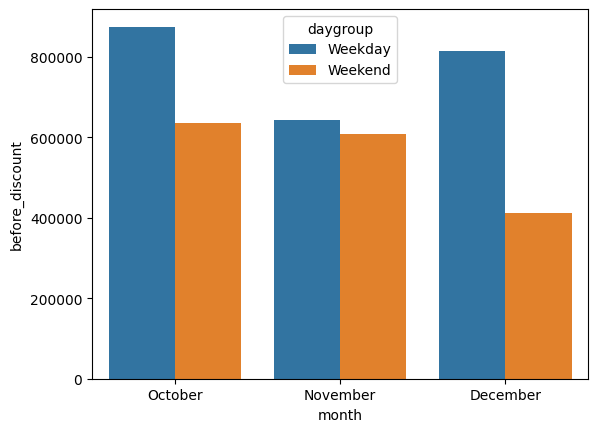

In [12]:
#Variabel
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend = ['Saturday','Sunday']
month = ['October','November','December']

#Menambahkan hari dalam dataset
df['day'] = df['order_date'].dt.day_name()

#Menambahkan bulan dalam dataset
df['month'] = df['order_date'].dt.month_name()

#Menambahkan nomor bulan dalam dataset
df['month_num'] = df['order_date'].dt.month

#Kondisi
f1 = df['is_valid']==1
f2 = df['order_date'].dt.year==2022
f3 = df['day'].isin(weekday)
f4 = df['day'].isin(weekend)
f5 = df['month'].isin(month)


#variabel tambahan untuk filtering
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend = ['Saturday','Sunday']
month = ['October','November','December']

#Membuat filter/kondisi yang dibutuhkan dalam variabel baru
f1 = df['is_valid']==1
f2 = df['order_date'].dt.year==2022
f3 = df['day'].isin(weekday)
f4 = df['day'].isin(weekend)
f5 = df['month'].isin(month)

#Data Weekday
day = df[(f1) & (f2) & (f3) & (f5)]
day['daygroup'] = 'Weekday' #Tambahkan kolom daygroup sebagai kelompok weekday
day = day.groupby(by=['month','daygroup','month_num'])['before_discount'].mean().round().reset_index()

#Data Weekend
end = df[(f1) & (f2) & (f4) & (f5)]
end['daygroup'] = 'Weekend' #Tambahkan kolom daygroup sebagai kelompok weekend
end = end.groupby(by=['month','daygroup','month_num'])['before_discount'].mean().round().reset_index()

#Menggabungkan data Weekday dan Weekend
mergeday = pd.concat([day,end],axis=0)

#Urutkan berdasarkan nomor bulan
mergeday = mergeday.sort_values(by='month_num',ascending = True)

#Tampilkan data dalam grafik batang
sns.barplot(mergeday,x='month',y='before_discount',hue='daygroup')

## `Jawaban No 4.2`

<Axes: xlabel='daygroup', ylabel='before_discount'>

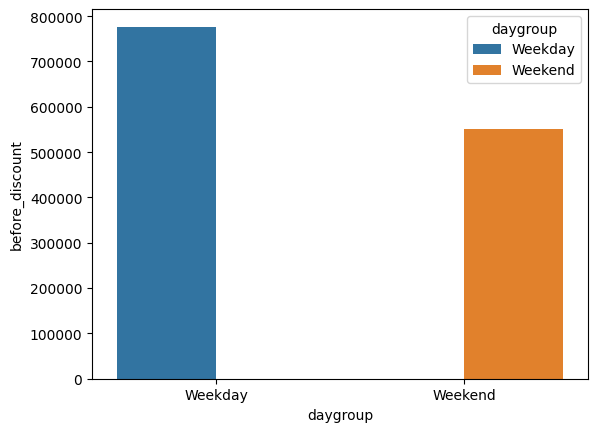

In [13]:
#Kelompokkan data berdasarkan daygroup kemudian hitung nilai rata2nya yang baru
merge3 = mergeday.groupby(['daygroup'], as_index=False).mean(numeric_only=True)

#Tampilkan dalam grafik batang
sns.barplot(merge3,x='daygroup',y='before_discount',hue='daygroup')